In [1]:
import os
import cv2
import torch
import numpy as np
import torch
import time

from facenet_pytorch import MTCNN, InceptionResnetV1
from IPython.display import clear_output



In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.4, 0.5, 0.5], factor=0.709, post_process=True,
    select_largest = True,
    device=device
)

model = InceptionResnetV1(pretrained='vggface2',
                          classify=False)

model.eval()

clear_output()

In [3]:
root_dir = "Dataset"


In [4]:
name_face_train = []
all_vector_train = []
count=1
for folder in os.listdir(root_dir):
    num_length =  len(os.listdir(os.path.join(root_dir, folder)))
    foot_dir = os.path.join(root_dir, folder)
    all_face = []
    img_train = []
    clear_output()
    print(f"Đang tiến hành {count}/{len(os.listdir(root_dir))}: {folder}")
    count+=1
    for file in os.listdir(foot_dir):
        img = cv2.imread(os.path.join(foot_dir, file))
        img = cv2.resize(img, (512,512))
        all_face.append(img)
    
    img_train = all_face[:int(0.7*num_length)]

    
    for img in img_train:
        filename_crop = mtcnn(img)
        if filename_crop is not None:
            vector_emb = None
            vector_emb = model(filename_crop.reshape(1, 3, 160, 160))
            all_vector_train.append(vector_emb.detach().numpy())
            name_face_train.append(folder)
   

    

Đang tiến hành 31/31: Zac Efron


In [5]:
all_vector_train[0].shape

(1, 512)

In [6]:
name_face_test = []
all_vector_test = []
count=1
for folder in os.listdir(root_dir):
    num_length =  len(os.listdir(os.path.join(root_dir, folder)))
    foot_dir = os.path.join(root_dir, folder)
    all_face = []
    img_train = []
    clear_output()
    print(f"Đang tiến hành {count}/{len(os.listdir(root_dir))}: {folder}")
    count+=1
    for file in os.listdir(foot_dir):
        img = cv2.imread(os.path.join(foot_dir, file))
        img = cv2.resize(img, (512,512))
        all_face.append(img)
    
    img_test = all_face[int(0.7*num_length):]

    
    for img in img_test:
        filename_crop = mtcnn(img)
        if filename_crop is not None:
            vector_emb = None
            vector_emb = model(filename_crop.reshape(1, 3, 160, 160))
            all_vector_test.append(vector_emb.detach().numpy())
            name_face_test.append(folder)
   

    

Đang tiến hành 31/31: Zac Efron


In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
le.fit(name_face_train)
y_train = le.transform(name_face_train)
y_test = le.transform(name_face_test)

In [9]:
X_train = np.array(all_vector_train)
X_train = X_train.squeeze()

In [10]:
clf = SVC()
# Train classifier với dữ liệu
clf.fit(X_train, y_train)

SVC()

In [15]:
X_test = np.array(all_vector_test).squeeze()
start = time.perf_counter()
predicted = clf.predict(X_test)
end = time.perf_counter()
print("Time run : ", end - start)

Time run :  0.18607570000006035


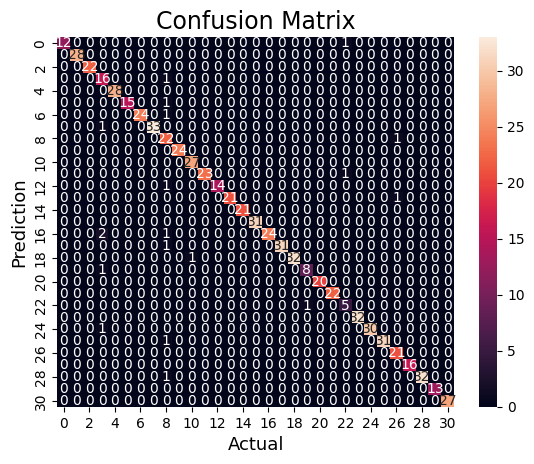

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,predicted)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



In [13]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        22
           3       0.76      0.94      0.84        17
           4       1.00      1.00      1.00        28
           5       1.00      0.94      0.97        16
           6       1.00      0.96      0.98        25
           7       1.00      0.97      0.99        34
           8       0.73      0.96      0.83        23
           9       1.00      1.00      1.00        24
          10       0.96      1.00      0.98        27
          11       1.00      0.96      0.98        24
          12       1.00      0.93      0.97        15
          13       1.00      0.95      0.98        22
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        31
          16       1.00      0.89      0.94        27
          17       1.00    